In [3]:
import cv2
import os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D,LeakyReLU, PReLU
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model

Preprocessing of Images

In [4]:
data_path = "/Users/yash9/Documents/Projects/Mask Recognition/dest_folder/train"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [5]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [6]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))


In [7]:
target=np.array(target)
new_target=np_utils.to_categorical(target)

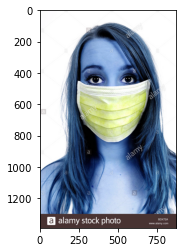

In [9]:
plt.imshow(img)

In [10]:
new_target[-1]

array([0., 1.], dtype=float32)

In [136]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(PReLU())
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64))
model.add(PReLU())
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [137]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [138]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 1056 samples, validate on 264 samples
Epoch 1/20
1056/1056 [==============================] - 8s 7ms/step - loss: 0.7282 - accuracy: 0.4830 - val_loss: 0.6721 - val_accuracy: 0.7235
Epoch 2/20
1056/1056 [==============================] - 5s 5ms/step - loss: 0.5881 - accuracy: 0.7045 - val_loss: 0.4161 - val_accuracy: 0.8561
Epoch 3/20
1056/1056 [==============================] - 6s 5ms/step - loss: 0.3592 - accuracy: 0.8475 - val_loss: 0.2737 - val_accuracy: 0.9053
Epoch 4/20
1056/1056 [==============================] - 6s 5ms/step - loss: 0.2282 - accuracy: 0.9138 - val_loss: 0.2286 - val_accuracy: 0.9091: 2s - loss: 0.2255 - accuracy: 0. - ETA: 2s - loss:
Epoch 5/20
1056/1056 [==============================] - 6s 5ms/step - loss: 0.1771 - accuracy: 0.9328 - val_loss: 0.2016 - val_accuracy: 0.9167
Epoch 6/20
1056/1056 [==============================] - 6s 6ms/step - loss: 0.1315 - accuracy: 0.9498 - val_loss: 0.2462 - val_accuracy: 0.9167
Epoch 7/20
1056/1056 [===============

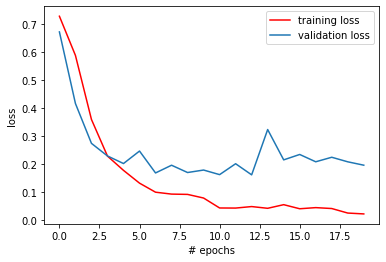

In [139]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [140]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2636173485180849391
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4828102656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11929319636544393147
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


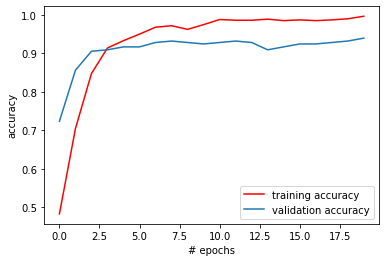

In [142]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [143]:
print(model.evaluate(test_data,test_target))

330/330 [==============================] - 1s 3ms/step
[0.2506976135752418, 0.9363636374473572]


In [11]:
model = load_model('model-013.model')

# face_clsfr = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


source=cv2.VideoCapture(0)

labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [12]:

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
    
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [ ]:
labels_dict={1:'without_mask',0:'with_mask'}
color_dict={1:(0,0,255),0:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(im,1.3,5)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

In [107]:
export OPENCV_OPENCL_DEVICE = disabled

SyntaxError: invalid syntax (<ipython-input-107-f082acb3ba76>, line 1)